# Bài Tập 
1. Thử chạy SVM trên 2 files data_3.txt và data_4.txt với C=[0.1, 1.0, 10.0, 100.0].
2. Nhận xét với từng $C$ khác nhau thì mô hình thay đổi như thế nào.
3. Nêu lợi và hại khi tăng $gamma$ và giảm $gamma$.

In [1]:
# Import libraries
import warnings

warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def display_data_and_boundary(x, y, pred_fn):
    # Determine the x1- and x2- limits of the plot
    x1min = min(x[:, 0]) - 1
    x1max = max(x[:, 0]) + 1
    x2min = min(x[:, 1]) - 1
    x2max = max(x[:, 1]) + 1
    plt.xlim(x1min, x1max)
    plt.ylim(x2min, x2max)
    # Plot the data points
    k = int(max(y)) + 1
    cols = ['ro', 'k^', 'b*', 'gx']
    for label in range(k):
        plt.plot(x[(y == label), 0], x[(y == label), 1], cols[label % 4], markersize=8)

    # Construct a grid of points at which to evaluate the classifier
    grid_spacing = 0.05
    xx1, xx2 = np.meshgrid(np.arange(x1min, x1max, grid_spacing), np.arange(x2min, x2max, grid_spacing))
    grid = np.c_[xx1.ravel(), xx2.ravel()]
    Z = np.array([pred_fn(pt) for pt in grid])
    # Show the classifier's boundary using a color plot
    Z = Z.reshape(xx1.shape)
    plt.pcolormesh(xx1, xx2, Z, cmap=plt.cm.Pastel1, vmin=0, vmax=k)
    plt.show()

## Câu 1

### data_3.txt

In [3]:
# Đọc file data_3.txt
data3 = np.loadtxt("data_3.txt")
# Tạo training set x và label y
x3 = data3[:, 0:2]
y3 = data3[:, 2]

#### Train SVM với kernel linear

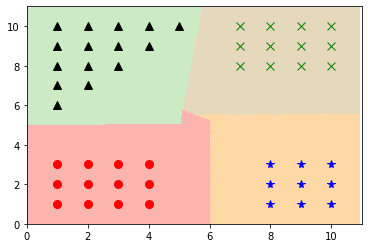

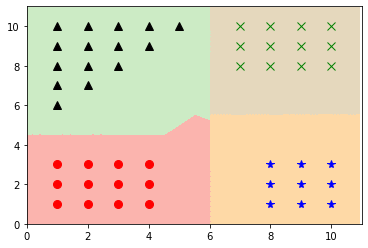

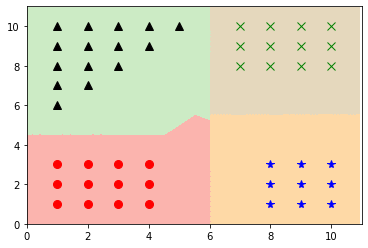

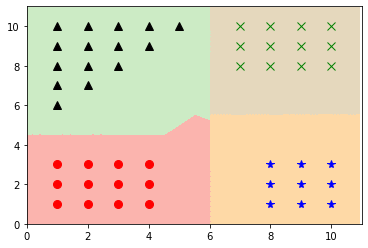

In [4]:
from sklearn.svm import SVC

C = [0.1, 1, 10, 100]
for i in C:
    clf = SVC(C=i, kernel="linear")
    clf.fit(x3, y3)
    pred_fn = lambda p: clf.predict(p.reshape(1, -1))
    display_data_and_boundary(x3, y3, pred_fn)

#### Train SVM với kernel rbf

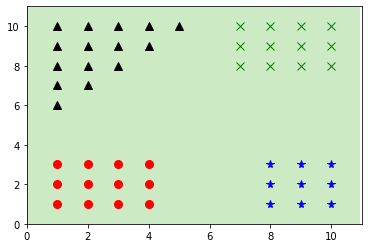

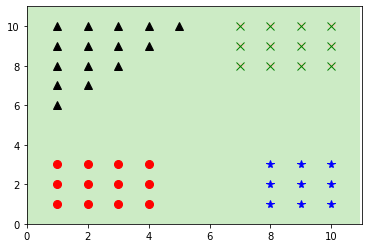

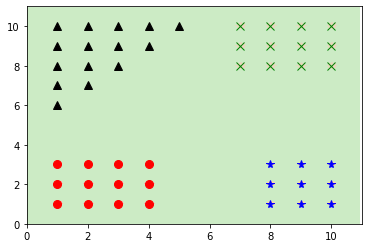

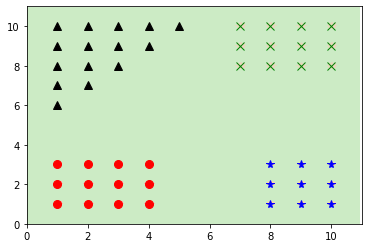

In [5]:
for i in C:
    clf = SVC(C=i, kernel="rbf", gamma=100)
    clf.fit(x3, y3)
    pred_fn = lambda p: clf.predict(p.reshape(1, -1))
    display_data_and_boundary(x3, y3, pred_fn)

### data_4.txt

In [6]:
# Đọc file data_4.txt
data4 = np.loadtxt("data_4.txt")
# Tạo training set x và label y
x4 = data4[:, 0:2]
y4 = data4[:, 2]

#### Train SVM với kernel linear

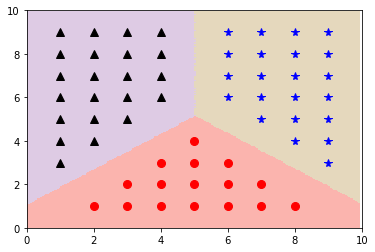

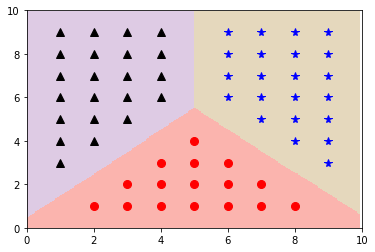

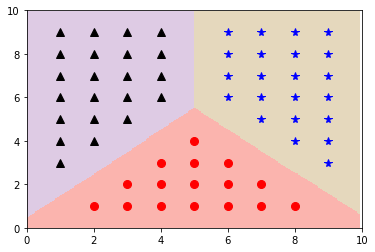

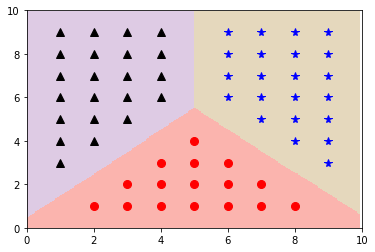

In [7]:
for i in C:
    clf = SVC(C=i, kernel="linear")
    clf.fit(x4, y4)
    pred_fn = lambda p: clf.predict(p.reshape(1, -1))
    display_data_and_boundary(x4, y4, pred_fn)

#### Train SVM với kernel rbf

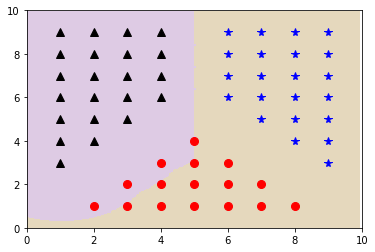

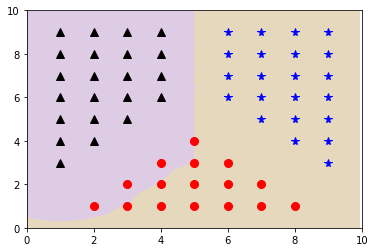

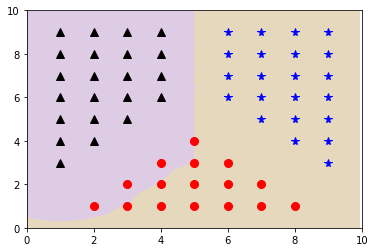

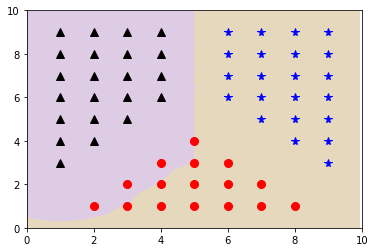

In [8]:
for i in C:
    clf = SVC(C=i, kernel="rbf", gamma=100)
    clf.fit(x4, y4)
    pred_fn = lambda p: clf.predict(p.reshape(1, -1))
    display_data_and_boundary(x4, y4, pred_fn)

## Câu 2
Khi C càng lớn, model được huấn luyện sẽ càng fit với dữ liệu trong tập train. Điều này cũng đồng nghĩa với việc model có thể bị overfitting.

## Câu 3

### Thử thay đổi gamma với data_3.txt

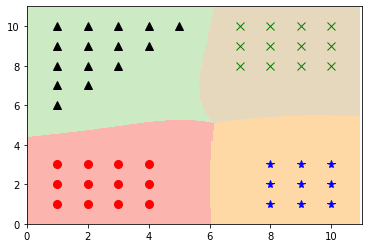

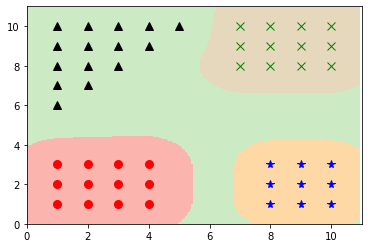

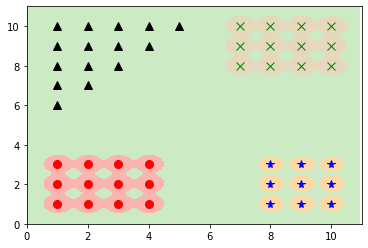

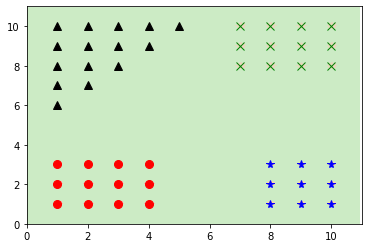

In [9]:
for i in C:
    clf = SVC(C=100, kernel="rbf", gamma=i)
    clf.fit(x3, y3)
    pred_fn = lambda p: clf.predict(p.reshape(1, -1))
    display_data_and_boundary(x3, y3, pred_fn)

### Thử thay đổi gamma với data_4.txt

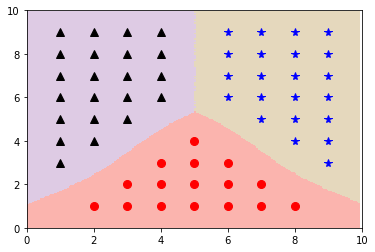

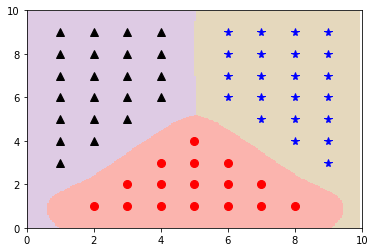

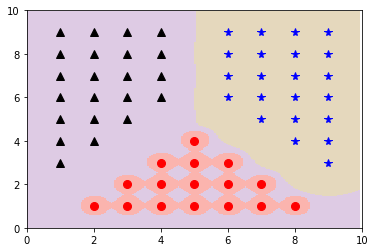

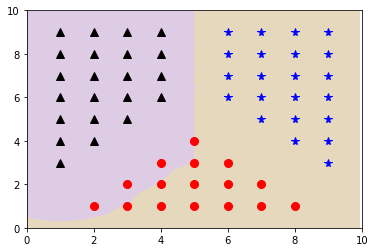

In [10]:
for i in C:
    clf = SVC(C=100, kernel="rbf", gamma=i)
    clf.fit(x4, y4)
    pred_fn = lambda p: clf.predict(p.reshape(1, -1))
    display_data_and_boundary(x4, y4, pred_fn)

**Kết luận:** Giá trị thấp của gamma cho thấy nhiều điểm được nhóm lại với nhau. Đối với các giá trị cao của gamma, các điểm cần phải rất gần nhau để được xem xét trong cùng một nhóm. Do đó, các mô hình có giá trị gamma rất lớn có xu hướng overfitting.